### 학교 데이터 준비

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/학교/서울시 학교 기본정보.csv', encoding = 'cp949')
df.head()

,학교종류명,설립구분,표준학교코드,학교명,영문학교명,관할조직명,도로명우편번호,도로명주소,도로명상세주소,전화번호,...,주야구분명,설립일자,개교기념일,시도교육청코드,시도교육청명,소재지명,주야과정,계열명,학과명,적재일시
0,중학교,사립,7134161,동국대학교사범대학부속가람중학교,Garam Middle School Attached to College of Edu...,서울특별시성동광진교육지원청,5038,서울특별시 광진구 광나루로36길 47,", 동국대학교사범대학부속가람중학교 (구의동)",02-6948-2280,...,주간,19300620,19300620,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20250302
1,각종학교(중),사립,7134155,선화예술중학교,Sunhwa Arts Middle School,서울특별시성동광진교육지원청,4991,서울특별시 광진구 천호대로 664,/ 선화예술중고등학교 (능동),02-2204-1100,...,주간,19731201,19730705,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230627
2,초등학교,공립,7134150,서울숭신초등학교,Seoul Soongshin Elementary School,서울특별시성동광진교육지원청,4702,서울특별시 성동구 마장로 161,(하왕십리동),02-2252-5950,...,주간,19590403,19590403,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615
3,중학교,공립,7134142,행당중학교,Haengdang Middle School,서울특별시성동광진교육지원청,4764,서울특별시 성동구 왕십리로 189,(행당동/행당중학교),02-2292-2721,...,주간,19680806,19681002,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615
4,중학교,사립,7134141,한양대학교사범대학부속중학교,Hanyang University Middle School,서울특별시성동광진교육지원청,4761,서울특별시 성동구 마조로 42,(사근동/한양사대부속중?고등학교),02-2200-3700,...,주간,19600118,19600118,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615


In [3]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   학교종류명        3936 non-null   object
 1   설립구분         3936 non-null   object
 2   표준학교코드       3936 non-null   int64 
 3   학교명          3936 non-null   object
 4   영문학교명        3934 non-null   object
 5   관할조직명        3936 non-null   object
 6   도로명우편번호      3936 non-null   int64 
 7   도로명주소        3936 non-null   object
 8   도로명상세주소      3936 non-null   object
 9   전화번호         3936 non-null   object
 10  홈페이지주소       3934 non-null   object
 11  팩스번호         3932 non-null   object
 12  남녀공학구분명      3936 non-null   object
 13  고등학교구분명      2841 non-null   object
 14  산업체특별학급존재여부  3936 non-null   object
 15  고등학교일반실업구분명  3904 non-null   object
 16  특수목적고등학교계열명  195 non-null    object
 17  입시전후기구분명     3936 non-null   object
 18  주야구분명        3936 non-null   object
 19  설립일자         3936 non-null 

#### 2023년도 이후에 설립된 학교 확인: 다른 데이터들을 2023년도 기준으로 사용했기 때문

In [4]:
# '개교기념일' 컬럼이 int64 형식일 경우, 문자열로 변환 후 datetime으로 변환
df['개교기념일'] = pd.to_datetime(df['개교기념일'].astype(str), errors='coerce')

# 연도 추출
df['설립연도'] = df['개교기념일'].dt.year

# 2023년 이후 설립된 학교 필터링
df_2023이후 = df[df['설립연도'] > 2023]

# 결과 출력
if not df_2023이후.empty:
    print("2023년 이후 설립된 학교가 있습니다:")
    print(df_2023이후[['학교명', '설립연도']])
else:
    print("2023년 이후 설립된 학교는 없습니다.")

2023년 이후 설립된 학교가 있습니다:
           학교명  설립연도
333   서울개현초등학교  2024
1054   서울온라인학교  2025
1055   서울온라인학교  2025


In [5]:
# 2023년 이전에 설립된 학교만 필터링
df_filtered = df[df['설립연도'] <= 2023].copy()


In [6]:
# 사용할 컬럼만 남기기
df1 = df_filtered[["학교종류명", "학교명", "도로명주소"]]
df1.head()

,학교종류명,학교명,도로명주소
0,중학교,동국대학교사범대학부속가람중학교,서울특별시 광진구 광나루로36길 47
1,각종학교(중),선화예술중학교,서울특별시 광진구 천호대로 664
2,초등학교,서울숭신초등학교,서울특별시 성동구 마장로 161
3,중학교,행당중학교,서울특별시 성동구 왕십리로 189
4,중학교,한양대학교사범대학부속중학교,서울특별시 성동구 마조로 42


#### 

### 초/중/고등학교만 남기기

In [7]:
df1["학교종류명"].unique()

array(['중학교', '각종학교(중)', '초등학교', '각종학교(고)', '평생학교(초)-3년6학기', '각종학교(초)',
       '방송통신중학교', '고등학교', '특수학교', '외국인학교', '평생학교(고)-2년6학기',
       '평생학교(고)-3년6학기', '평생학교(중)-2년6학기', '고등기술학교', '방송통신고등학교', '공동실습소'],
      dtype=object)

In [8]:
# 포함할 학교종류
valid_school_types = ['초등학교', '중학교', '고등학교']

# 필터링 적용
df2 = df1[df1['학교종류명'].isin(valid_school_types)].copy()
df2.head()

,학교종류명,학교명,도로명주소
0,중학교,동국대학교사범대학부속가람중학교,서울특별시 광진구 광나루로36길 47
2,초등학교,서울숭신초등학교,서울특별시 성동구 마장로 161
3,중학교,행당중학교,서울특별시 성동구 왕십리로 189
4,중학교,한양대학교사범대학부속중학교,서울특별시 성동구 마조로 42
5,중학교,자양중학교,서울특별시 광진구 뚝섬로41길 33


In [9]:
df2["학교종류명"].unique()

array(['중학교', '초등학교', '고등학교'], dtype=object)

#### 

### 자치구 컬럼 추가

In [10]:
# 서울 25개 자치구 리스트
seoul_gu_list = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구',
    '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'
]

# 자치구 추출 함수 정의
def extract_gu(address):
    for gu in seoul_gu_list:
        if gu in address:
            return gu
    return None  # 혹시 서울이 아닌 주소가 들어올 경우

# 적용
df3 = df2.copy()
df3['자치구'] = df3['도로명주소'].apply(extract_gu)
df3.head()

,학교종류명,학교명,도로명주소,자치구
0,중학교,동국대학교사범대학부속가람중학교,서울특별시 광진구 광나루로36길 47,광진구
2,초등학교,서울숭신초등학교,서울특별시 성동구 마장로 161,성동구
3,중학교,행당중학교,서울특별시 성동구 왕십리로 189,성동구
4,중학교,한양대학교사범대학부속중학교,서울특별시 성동구 마조로 42,성동구
5,중학교,자양중학교,서울특별시 광진구 뚝섬로41길 33,광진구


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3539 entries, 0 to 3931
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   학교종류명   3539 non-null   object
 1   학교명     3539 non-null   object
 2   도로명주소   3539 non-null   object
 3   자치구     3539 non-null   object
dtypes: object(4)
memory usage: 138.2+ KB


In [12]:
df4 = df3[["자치구", "학교명", "학교종류명"]]
df4.head()

,자치구,학교명,학교종류명
0,광진구,동국대학교사범대학부속가람중학교,중학교
2,성동구,서울숭신초등학교,초등학교
3,성동구,행당중학교,중학교
4,성동구,한양대학교사범대학부속중학교,중학교
5,광진구,자양중학교,중학교


#### 

### 자치구 단위로 학교 수 카운트

In [13]:
# 자치구 기준 학교 수 카운트
df_counts = df4.groupby('자치구')['학교명'].count().reset_index()
df_counts.columns = ['자치구', '학교 수']

# 자치구 전체 포함을 위해 기본 DataFrame 생성
df_all_gu = pd.DataFrame({'자치구': seoul_gu_list})

# 병합: 누락 자치구는 학교 수를 0으로 채움
df5 = df_all_gu.merge(df_counts, on='자치구', how='left').fillna(0)
df5['학교 수'] = df5['학교 수'].astype(int)  # 정수형으로 변환

# 결과
df5

,자치구,학교 수
0,종로구,141
1,중구,171
2,용산구,125
3,성동구,62
4,광진구,116
5,동대문구,122
6,중랑구,98
7,성북구,167
8,강북구,86
9,도봉구,89


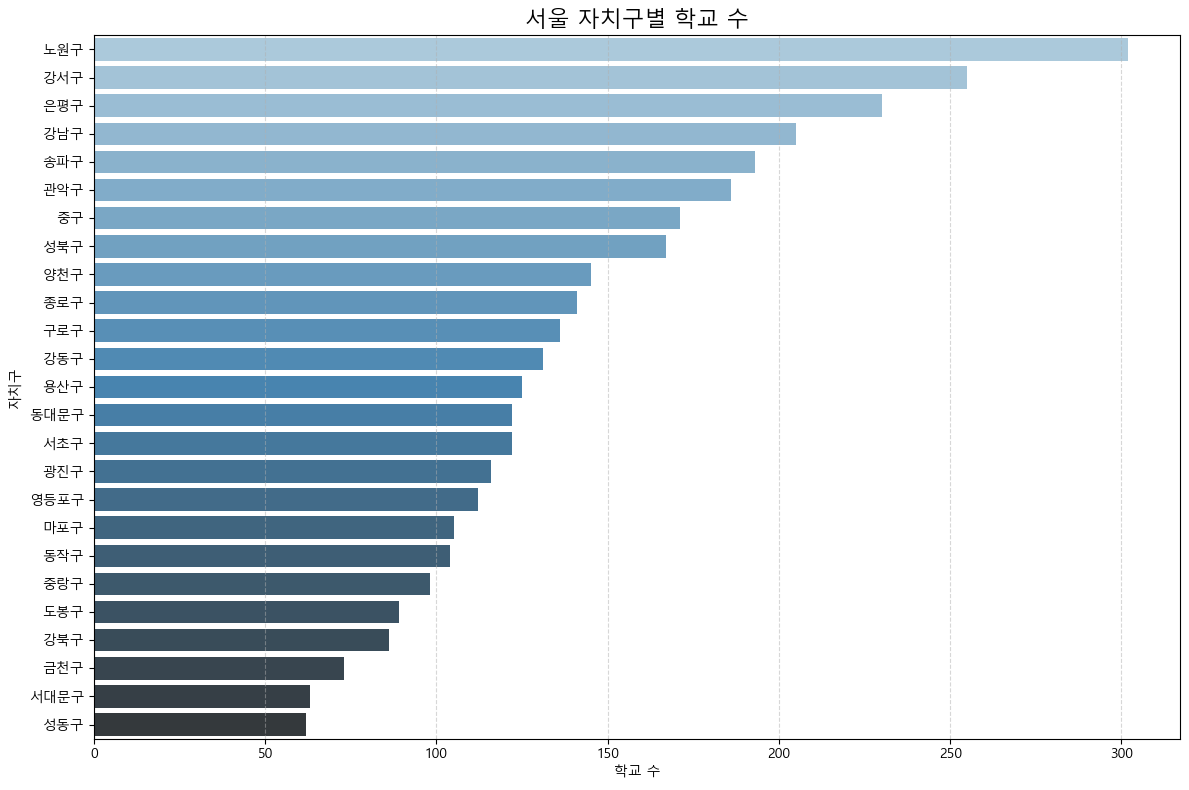

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 무시
warnings.filterwarnings("ignore")

# 한글 폰트 설정 (윈도우 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 자치구를 학교 수 기준으로 정렬 (선택 사항)
df5_sorted = df5.sort_values(by='학교 수', ascending=False)

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=df5_sorted, x='학교 수', y='자치구', palette='Blues_d')

plt.title('서울 자치구별 학교 수', fontsize=16)
plt.xlabel('학교 수')
plt.ylabel('자치구')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 

### csv로 저장

In [15]:
df5.to_csv("./data/자치구별_학교수.csv", index=False, encoding='utf-8-sig')
